In [77]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


# Load Data and merge 2 files

In [8]:
athlete = pd.read_csv('athlete_events.csv')
region = pd.read_csv('noc_regions.csv')
merged = pd.merge(athlete,region, on = 'NOC', how='left')

In [9]:
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
region    270746 non-null object
notes     5039 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


# Extracting swimming data

In [11]:
swimming = merged.loc[(merged['Sport'] == 'Swimming')]
print("Swimming Data Dimension:",swimming.shape)
print("Type:",type(swimming))
swimming.head()

Swimming Data Dimension: (23195, 17)
Type: <class 'pandas.core.frame.DataFrame'>


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN
35,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 200 metres Breaststroke,NaN,Finland,NaN
36,15,Arvo Ossian Aaltonen,M,22.0,NaN,NaN,Finland,FIN,1912 Summer,1912,Summer,Stockholm,Swimming,Swimming Men's 400 metres Breaststroke,NaN,Finland,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN


# Information and missing data

In [12]:
swimming.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23195 entries, 29 to 271088
Data columns (total 17 columns):
ID        23195 non-null int64
Name      23195 non-null object
Sex       23195 non-null object
Age       22671 non-null float64
Height    19150 non-null float64
Weight    18804 non-null float64
Team      23195 non-null object
NOC       23195 non-null object
Games     23195 non-null object
Year      23195 non-null int64
Season    23195 non-null object
City      23195 non-null object
Sport     23195 non-null object
Event     23195 non-null object
Medal     3048 non-null object
region    23048 non-null object
notes     515 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.2+ MB


# Missing data

In [13]:
swimming.isnull().sum()

ID            0
Name          0
Sex           0
Age         524
Height     4045
Weight     4391
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     20147
region      147
notes     22680
dtype: int64

# Check medal

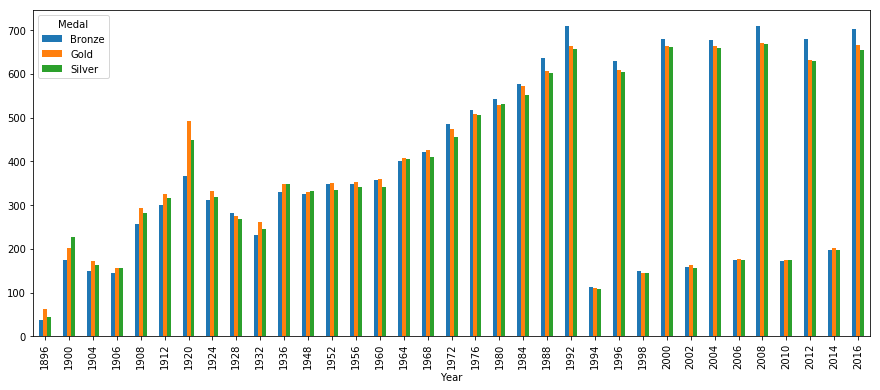

In [14]:
merged.groupby(['Year', 'Medal'])['Medal'].count().unstack().plot(kind='bar',figsize=(15,6))

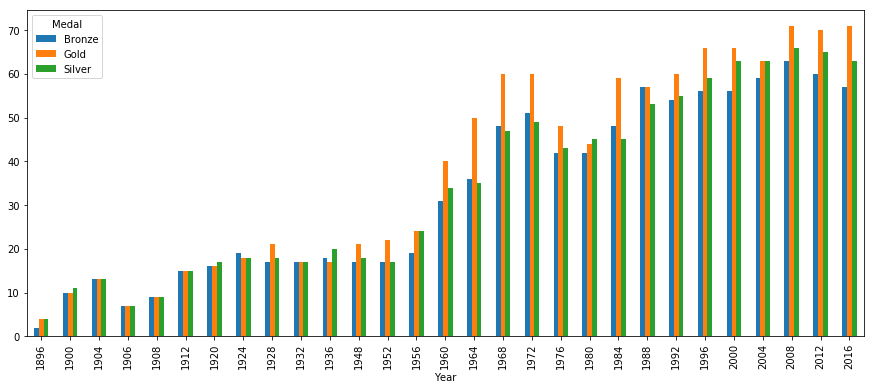

In [15]:
swimming.groupby(['Year', 'Medal'])['Medal'].count().unstack().plot(kind='bar',figsize=(15,6))

Turns out swimming only in summer

In [16]:
print('Swimming season:',swimming['Season'].unique())

Swimming season: ['Summer']


# Average Age, Height and Weight

/home/nhan/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


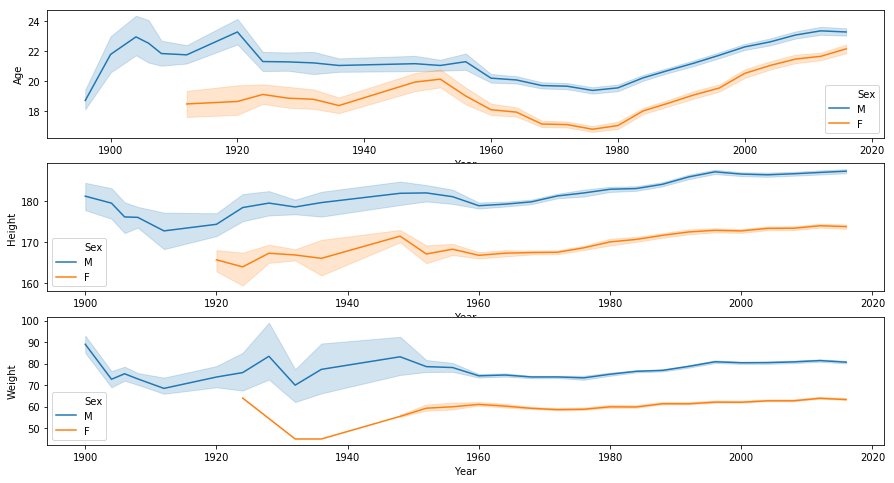

In [17]:
a4_dims = (15, 8)
fig, axes = plt.subplots(3,1,figsize=a4_dims)
sb.lineplot(ax = axes[0], x='Year',y='Age',hue='Sex',data=swimming)
sb.lineplot(ax = axes[1], x='Year',y='Height',hue='Sex',data=swimming)
sb.lineplot(ax = axes[2], x='Year',y='Weight',hue='Sex',data=swimming)

# Number of attendants

In [18]:
check = swimming.groupby('Year')[['Age','Weight','Height']].count()
check.tail()

,Age,Weight,Height
Year,,,
2000,1741,1716,1718
2004,1618,1611,1612
2008,1749,1722,1726
2012,1538,1518,1522
2016,1568,1535,1535


In [19]:
check['Total attendants'] = swimming['Year'].value_counts()


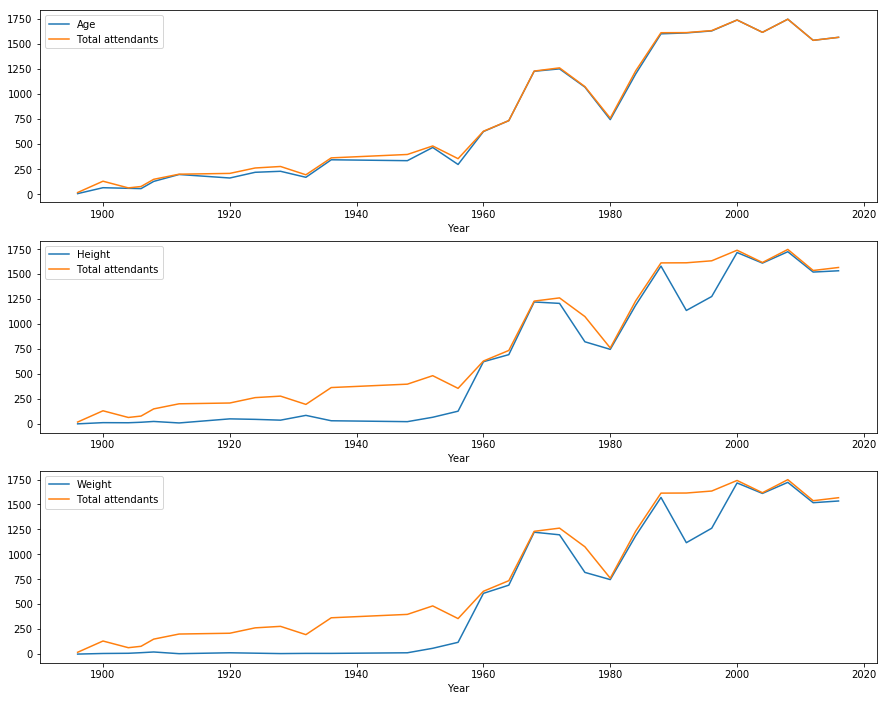

In [20]:
a4_dims = (15, 12)
fig, axes = plt.subplots(3,1,figsize=a4_dims)
check.plot.line(ax = axes[0],y=['Age','Total attendants'])
check.plot.line(ax = axes[1],y=['Height','Total attendants'])
check.plot.line(ax = axes[2],y=['Weight','Total attendants'])

In [21]:
check['non-null Age'] = check['Age']/check['Total attendants']
check['non-null Height'] = check['Height']/check['Total attendants']
check['non-null Weight'] = check['Weight']/check['Total attendants']
check.head()

,Age,Weight,Height,Total attendants,non-null Age,non-null Height,non-null Weight
Year,,,,,,,
1896,7,0,0,18,0.388889,0.000000,0.000000
1900,66,6,12,131,0.503817,0.091603,0.045802
1904,60,8,11,64,0.937500,0.171875,0.125000
1906,57,14,16,78,0.730769,0.205128,0.179487
1908,129,21,24,150,0.860000,0.160000,0.140000


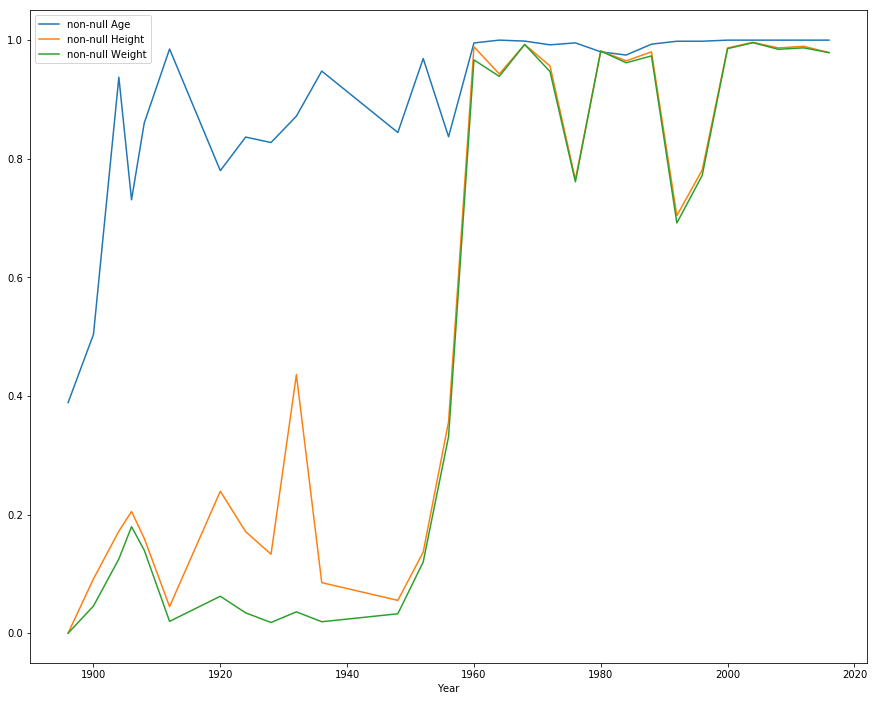

In [22]:
a4_dims = (15, 12)
fig, axes = plt.subplots(figsize=a4_dims)
check.plot.line(ax=axes,y=['non-null Age','non-null Height','non-null Weight'])

Until 1960, there were lots of missing Height and Weight data.

# Handling missing data

Only take data from 1960 til now

In [54]:
swimmingFrom60 = swimming[swimming['Year']>=1960]
swimmingFrom60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20007 entries, 100 to 271088
Data columns (total 17 columns):
ID        20007 non-null int64
Name      20007 non-null object
Sex       20007 non-null object
Age       19924 non-null float64
Height    18615 non-null float64
Weight    18521 non-null float64
Team      20007 non-null object
NOC       20007 non-null object
Games     20007 non-null object
Year      20007 non-null int64
Season    20007 non-null object
City      20007 non-null object
Sport     20007 non-null object
Event     20007 non-null object
Medal     2430 non-null object
region    19862 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.7+ MB


# Replace NaN value in Medal column

In [55]:
swimmingFrom60['Medal'].fillna(value='No Medal',inplace = True)

Look for data with 3 Nan value in Age, Weight, Height

In [56]:
a = swimmingFrom60.loc[(swimmingFrom60['Age'].isnull()) & 
                       (swimmingFrom60['Height'].isnull())& 
                       (swimmingFrom60['Weight'].isnull())]
print('Type of medal:',a['Medal'].unique())
a.info()

Type of medal: ['No Medal']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 3403 to 264588
Data columns (total 17 columns):
ID        62 non-null int64
Name      62 non-null object
Sex       62 non-null object
Age       0 non-null float64
Height    0 non-null float64
Weight    0 non-null float64
Team      62 non-null object
NOC       62 non-null object
Games     62 non-null object
Year      62 non-null int64
Season    62 non-null object
City      62 non-null object
Sport     62 non-null object
Event     62 non-null object
Medal     62 non-null object
region    62 non-null object
notes     0 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 8.7+ KB


Only 62 data have missing values all Age, Weight, Height; Contain only 'No medal'. Therefore we can get rid of this data without creating much bias

In [58]:
s60 = swimmingFrom60.loc[(swimmingFrom60['Age'].notnull()) | 
                       (swimmingFrom60['Height'].notnull()) | 
                       (swimmingFrom60['Weight'].notnull())]
s60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 100 to 271088
Data columns (total 17 columns):
ID        19945 non-null int64
Name      19945 non-null object
Sex       19945 non-null object
Age       19924 non-null float64
Height    18615 non-null float64
Weight    18521 non-null float64
Team      19945 non-null object
NOC       19945 non-null object
Games     19945 non-null object
Year      19945 non-null int64
Season    19945 non-null object
City      19945 non-null object
Sport     19945 non-null object
Event     19945 non-null object
Medal     19945 non-null object
region    19800 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 2.7+ MB


Fill in NaN value in region by copying the Team name

In [80]:
s60['region'].fillna(value=0,inplace= True)

In [81]:
s60['region'] = s60.apply(lambda row: row['Team'] 
                          if row['region']==0
                         else row['region'],axis =1)

Take care of Age,Weight and Height

Get average value of every female or male athletes in a specific year (in case needed)

In [141]:
average = s60.groupby(['Year','Sex'])[['Age','Weight','Height']].mean().unstack()
average.head()

Age                Weight                 Height            
Sex           F          M          F          M           F           M
Year                                                                    
1960  18.104418  20.195767  61.060729  74.331492  166.818548  178.920000
1964  17.945455  20.078091  60.270588  74.706422  167.341176  179.298405
1968  17.157598  19.706897  59.233459  73.800866  167.497164  179.855700
1972  17.120000  19.662242  58.627542  73.816031  167.567766  181.306647
1976  16.810757  19.383128  58.806841  73.386646  168.647887  182.030675

Use data from athletes of "that" region in "that" Year for imputation
Use multi-indexing to put mean value in a dataframe

In [140]:
country = s60.groupby(['Year','region','Sex'])[['Age','Height','Weight']].mean().unstack()
country.head()

Age                 Height             Weight           
Sex                     F          M           F           M      F          M
Year region                                                                   
1960 Argentina        NaN  16.500000         NaN  175.000000    NaN  68.250000
     Australia  18.190476  19.560000  167.285714  182.217391   62.8  78.619048
     Austria    19.166667  21.666667  165.166667  180.000000   61.0  68.666667
     Belgium    16.000000  19.000000  161.000000  180.000000   63.0  72.500000
     Brazil           NaN  17.444444         NaN  182.888889    NaN        NaN

Function: if data is missing, we impute with the value in the "country" table. If the value in "country" table is missing also, use the value in "average" table


In [142]:
def func(val,val_class,year,region,sex):
    if not (np.isnan(val)):
        return val
    else:
        if not (np.isnan(country.loc[(year,region),(val_class,sex)])):
            return country.loc[(year,region),(val_class,sex)]
        else:
            return average.loc[year,(val_class,sex)]

In [144]:
missing_list = ['Age','Height','Weight']
for i in missing_list:
    s60[i]=s60.apply(lambda row: 
                 func(row[i],i,row['Year'],row['region'],row['Sex'])
                 ,axis = 1)

In [150]:
s60.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19945 entries, 100 to 271088
Data columns (total 17 columns):
ID        19945 non-null int64
Name      19945 non-null object
Sex       19945 non-null object
Age       19945 non-null float64
Height    19945 non-null float64
Weight    19945 non-null float64
Team      19945 non-null object
NOC       19945 non-null object
Games     19945 non-null object
Year      19945 non-null int64
Season    19945 non-null object
City      19945 non-null object
Sport     19945 non-null object
Event     19945 non-null object
Medal     19945 non-null object
region    19945 non-null object
notes     439 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 3.4+ MB


Round up number

In [157]:
s60 = round(s60)

# We have finished cleaning the data. It's time to try to predict the medal categories